In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:

# Load the dataset
file_path = "IPL_2025_Auction.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the data
print(data.head())

   Sr. No.           Player Name  Base Price  Winning Bid Capped/Uncapped  \
0        1            Noor Ahmad    20000000  100000000.0          Capped   
1        2  Ravichandaran Ashwin    20000000   97500000.0          Capped   
2        3          Devon Conway    20000000   62500000.0          Capped   
3        4    Syed Khaleel Ahmed    20000000   48000000.0          Capped   
4        5       Rachin Ravindra    15000000   40000000.0          Capped   

  Team Sold/Unsold  
0  CSK        Sold  
1  CSK        Sold  
2  CSK        Sold  
3  CSK        Sold  
4  CSK        Sold  


In [25]:
# Get basic information about the dataset
print(data.info())

# Summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sr. No.          577 non-null    int64  
 1   Player Name      577 non-null    object 
 2   Base Price       577 non-null    int64  
 3   Winning Bid      182 non-null    float64
 4   Capped/Uncapped  577 non-null    object 
 5   Team             182 non-null    object 
 6   Sold/Unsold      577 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 31.7+ KB
None
          Sr. No.    Base Price   Winning Bid
count  577.000000  5.770000e+02  1.820000e+02
mean   289.000000  7.306759e+06  3.511813e+07
std    166.709828  6.114532e+06  4.848957e+07
min      1.000000  3.000000e+06  3.000000e+06
25%    145.000000  3.000000e+06  3.125000e+06
50%    289.000000  3.000000e+06  1.500000e+07
75%    433.000000  1.000000e+07  4.200000e+07
max    577.000000  2.000000e+07  2.700000e+08


In [26]:
# Fill missing values in 'Winning Bid' with 0 (for unsold players)
data['Winning Bid'] = data['Winning Bid'].fillna(0)

# Replace missing 'Team' values with 'No Team'
data['Team'] = data['Team'].fillna('No Team')

# Verify no missing values remain
print(data.isnull().sum())


Sr. No.            0
Player Name        0
Base Price         0
Winning Bid        0
Capped/Uncapped    0
Team               0
Sold/Unsold        0
dtype: int64


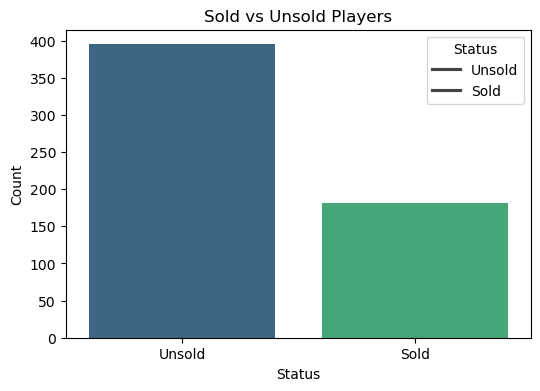

In [32]:
plt.figure(figsize=(6, 4))
bars = sns.barplot(
    x=sold_unsold_count.index,
    y=sold_unsold_count.values,
    hue=sold_unsold_count.index,  # Assign hue explicitly
    dodge=False,  # Prevent split bars for the same x
    palette='viridis'
)

# Manually add legend
labels = sold_unsold_count.index.tolist()
plt.legend(title="Status", labels=labels)
plt.title("Sold vs Unsold Players")
plt.xlabel("Status")
plt.ylabel("Count")
plt.show()


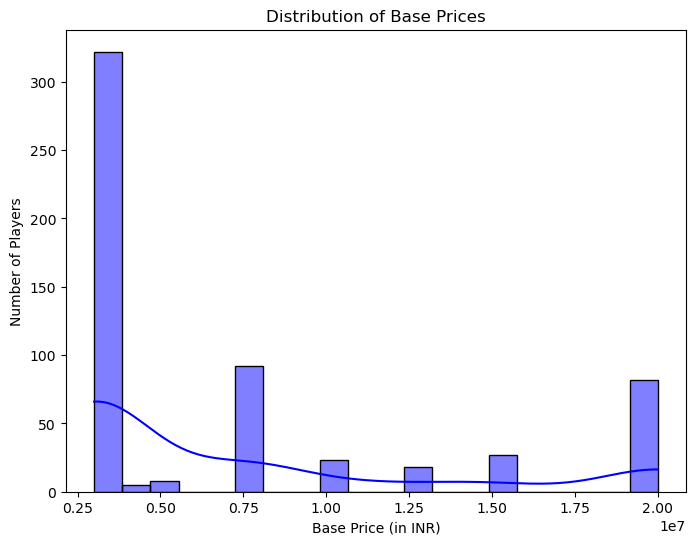

In [33]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="Base Price", kde=True, bins=20, color="blue")
plt.title("Distribution of Base Prices")
plt.xlabel("Base Price (in INR)")
plt.ylabel("Number of Players")
plt.show()


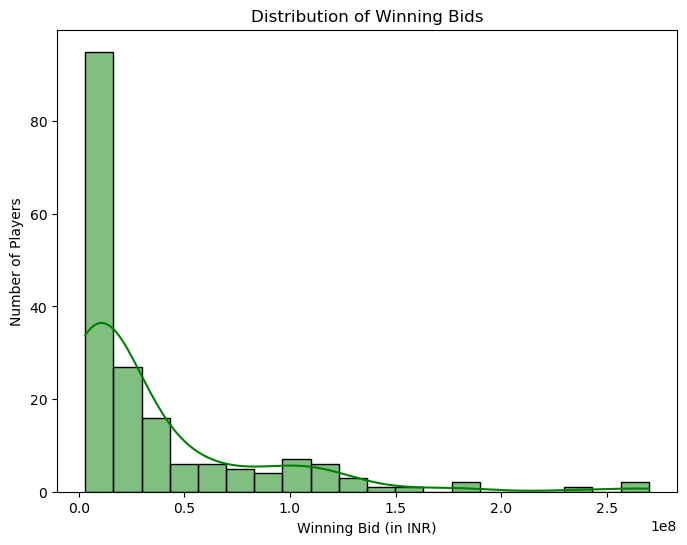

In [34]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df[df["Winning Bid"].notna()], x="Winning Bid", kde=True, bins=20, color="green")
plt.title("Distribution of Winning Bids")
plt.xlabel("Winning Bid (in INR)")
plt.ylabel("Number of Players")
plt.show()


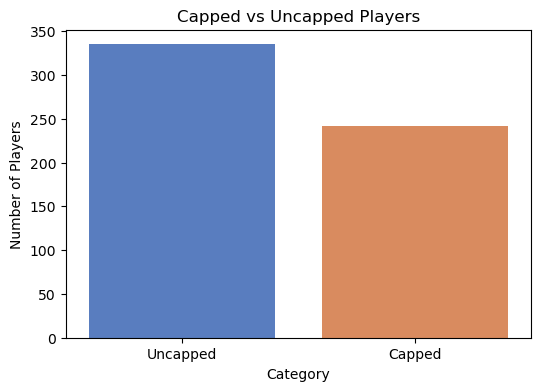

In [36]:
capped_uncapped_count = df["Capped/Uncapped"].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=capped_uncapped_count.index, y=capped_uncapped_count.values,hue=capped_uncapped_count.index, palette="muted")
plt.title("Capped vs Uncapped Players")
plt.xlabel("Category")
plt.ylabel("Number of Players")
plt.show()


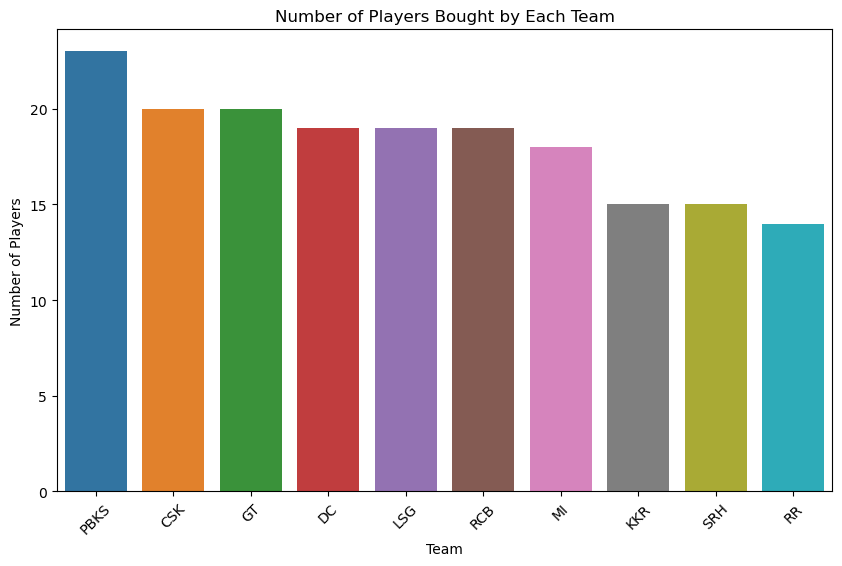

In [38]:
team_player_count = df["Team"].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=team_player_count.index, y=team_player_count.values,hue=team_player_count.index, palette="tab10")
plt.title("Number of Players Bought by Each Team")
plt.xlabel("Team")
plt.ylabel("Number of Players")
plt.xticks(rotation=45)
plt.show()


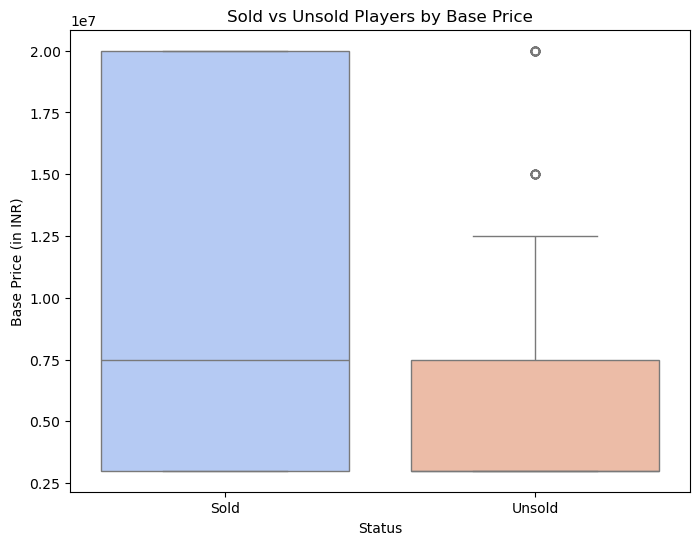

In [49]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df, 
    x="Sold/Unsold", 
    y="Base Price", 
    hue="Sold/Unsold",  # Explicitly assign hue
    dodge=False,        # Prevent multiple boxplots for the same category
    palette="coolwarm", 
    legend=False        # Suppress legend
)
plt.title("Sold vs Unsold Players by Base Price")
plt.xlabel("Status")
plt.ylabel("Base Price (in INR)")
plt.show()


In [52]:
team_insights = df[df["Sold/Unsold"] == "Sold"].groupby("Team")["Winning Bid"].agg(["sum", "mean"]).reset_index()
team_insights.rename(columns={"sum": "Total Spent", "mean": "Average Winning Bid"}, inplace=True)

print("Team Insights:\n", team_insights)


Team Insights:
    Team   Total Spent  Average Winning Bid
0   CSK  5.495000e+08         2.747500e+07
1    DC  7.280000e+08         3.831579e+07
2    GT  6.885000e+08         3.442500e+07
3   KKR  5.095000e+08         3.396667e+07
4   LSG  6.890000e+08         3.626316e+07
5    MI  4.480000e+08         2.488889e+07
6  PBKS  1.101500e+09         4.789130e+07
7   RCB  8.225000e+08         4.328947e+07
8    RR  4.070000e+08         2.907143e+07
9   SRH  4.480000e+08         2.986667e+07


In [53]:
# Player with the highest base price
highest_base_price_player = df.loc[df['Base Price'].idxmax()]

print("Player with the Highest Base Price:")
print(f"Player Name: {highest_base_price_player['Player Name']}")
print(f"Base Price: {highest_base_price_player['Base Price']}")


Player with the Highest Base Price:
Player Name: Noor Ahmad
Base Price: 20000000


In [54]:
# Player with the highest winning bid
highest_winning_bid_player = df.loc[df['Winning Bid'].idxmax()]

print("Player with the Highest Winning Bid:")
print(f"Player Name: {highest_winning_bid_player['Player Name']}")
print(f"Winning Bid: {highest_winning_bid_player['Winning Bid']}")


Player with the Highest Winning Bid:
Player Name: Rishabh Pant
Winning Bid: 270000000.0


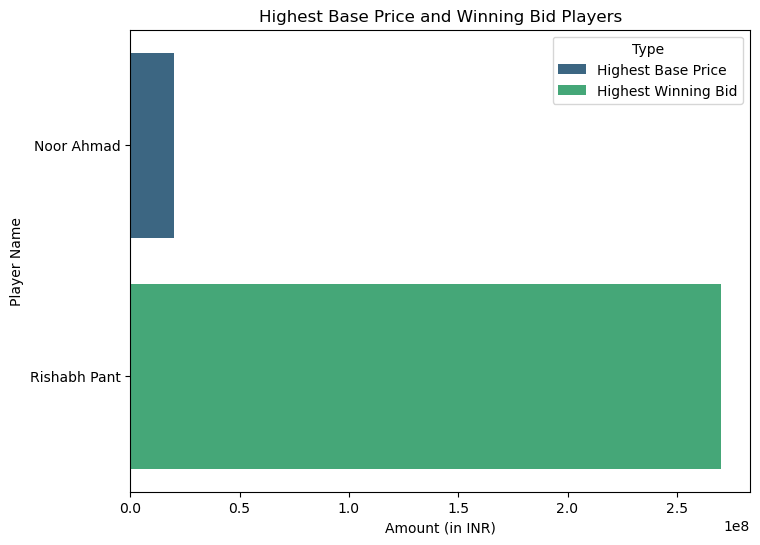

In [55]:
# Prepare data for visualization
highest_data = {
    "Player Name": [highest_base_price_player["Player Name"], highest_winning_bid_player["Player Name"]],
    "Amount": [highest_base_price_player["Base Price"], highest_winning_bid_player["Winning Bid"]],
    "Type": ["Highest Base Price", "Highest Winning Bid"]
}

highest_df = pd.DataFrame(highest_data)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x="Amount", y="Player Name", hue="Type", data=highest_df, palette="viridis")
plt.title("Highest Base Price and Winning Bid Players")
plt.xlabel("Amount (in INR)")
plt.ylabel("Player Name")
plt.show()


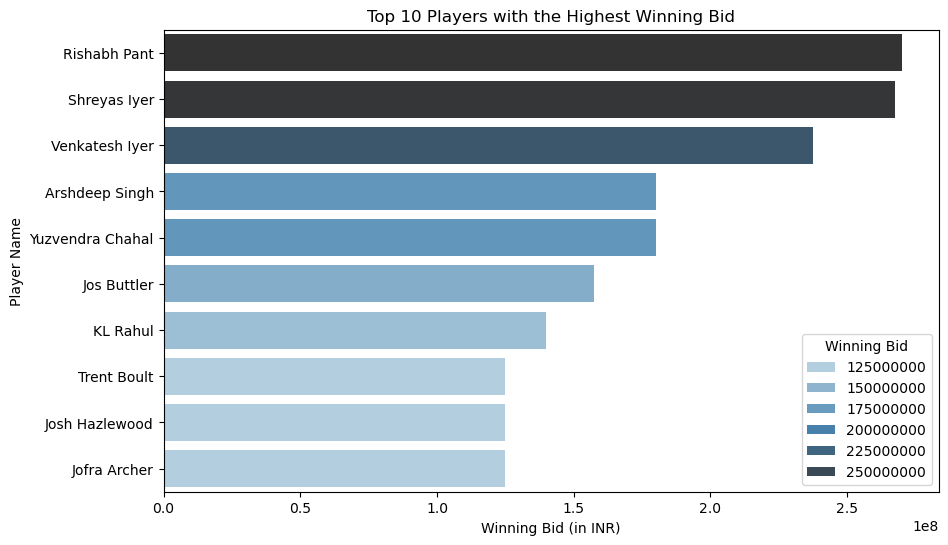

In [57]:
top_10_players = df[df["Winning Bid"].notna()].sort_values(by="Winning Bid", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x="Winning Bid", y="Player Name", data=top_10_players, palette="Blues_d", hue="Winning Bid")
plt.title("Top 10 Players with the Highest Winning Bid")
plt.xlabel("Winning Bid (in INR)")
plt.ylabel("Player Name")
plt.show()


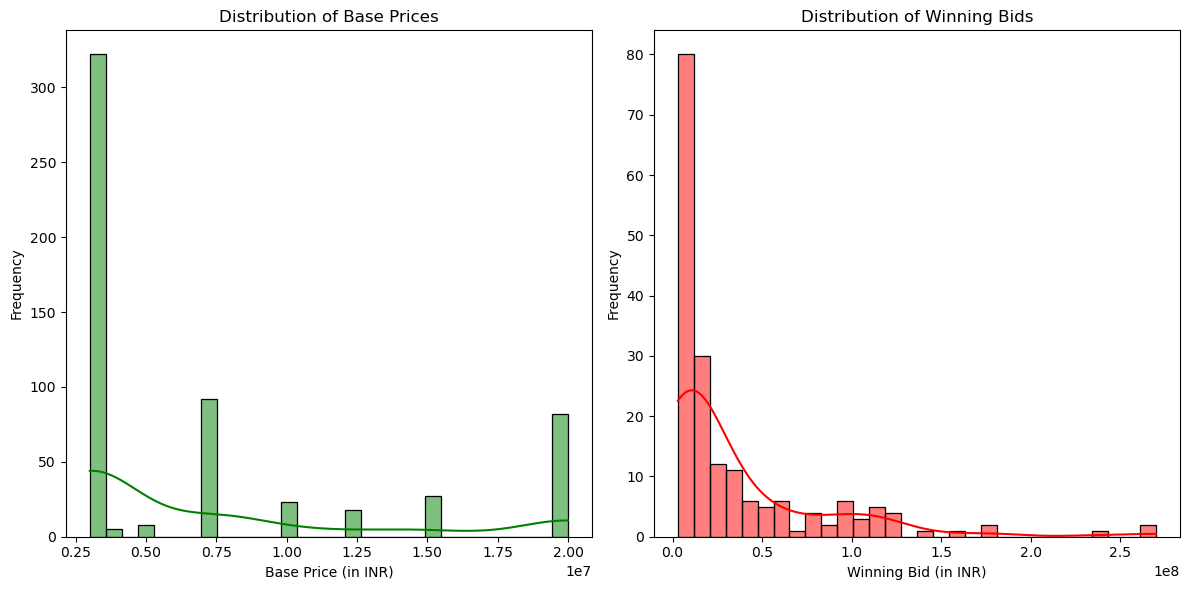

In [58]:
plt.figure(figsize=(12, 6))

# Subplot 1: Base Price Distribution
plt.subplot(1, 2, 1)
sns.histplot(df["Base Price"], kde=True, color="green", bins=30)
plt.title("Distribution of Base Prices")
plt.xlabel("Base Price (in INR)")
plt.ylabel("Frequency")

# Subplot 2: Winning Bid Distribution
plt.subplot(1, 2, 2)
sns.histplot(df["Winning Bid"].dropna(), kde=True, color="red", bins=30)
plt.title("Distribution of Winning Bids")
plt.xlabel("Winning Bid (in INR)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


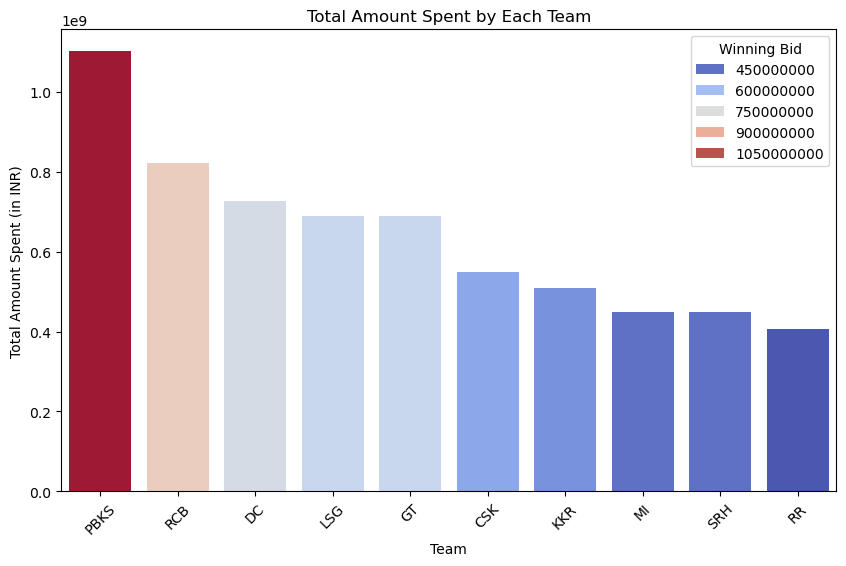

In [60]:
# Calculate total spent by each team
total_spent_by_team = df[df["Sold/Unsold"] == "Sold"].groupby("Team")["Winning Bid"].sum().reset_index()

# Plot the total amount spent by each team
plt.figure(figsize=(10, 6))
sns.barplot(x="Team", y="Winning Bid", data=total_spent_by_team.sort_values(by="Winning Bid", ascending=False), palette="coolwarm",hue="Winning Bid")
plt.title("Total Amount Spent by Each Team")
plt.xlabel("Team")
plt.ylabel("Total Amount Spent (in INR)")
plt.xticks(rotation=45)
plt.show()


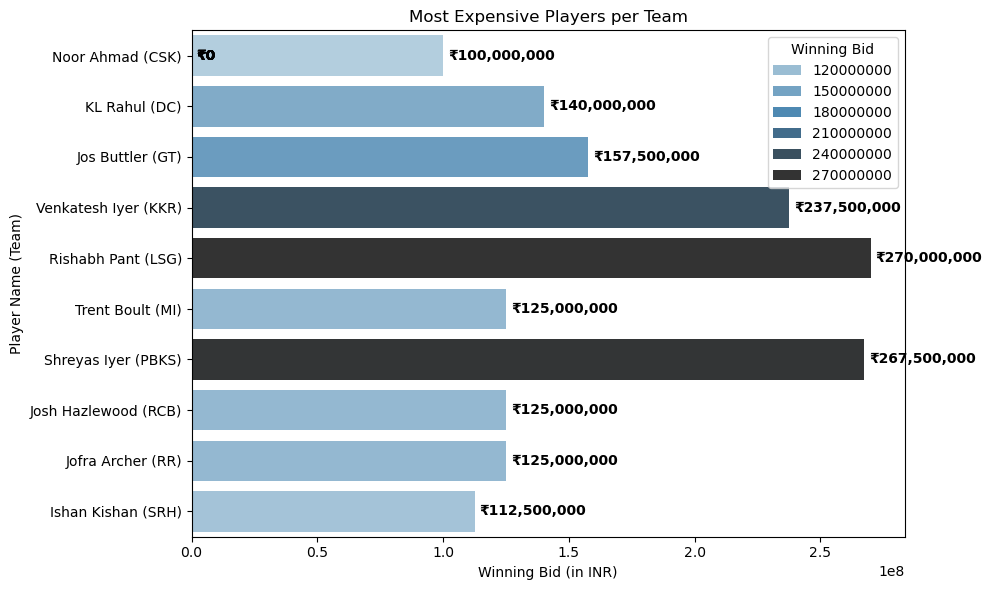

In [66]:
# Create a new column combining Player Name and Team
most_expensive_players["Player_Team"] = most_expensive_players["Player Name"] + " (" + most_expensive_players["Team"] + ")"

# Plotting the most expensive players per team with Player Name and Team
plt.figure(figsize=(10, 6))
bars = sns.barplot(x="Winning Bid", y="Player_Team", data=most_expensive_players, palette="Blues_d",hue="Winning Bid")

# Adding the Winning Bid text on top of each bar
for i, bar in enumerate(bars.patches):
    width = bar.get_width()  # The width of the bar (winning bid)
    plt.text(
        width + 2000000,  # Slightly offset the text to the right of the bar
        bar.get_y() + bar.get_height() / 2,  # Center the text vertically on the bar
        f'₹{width:,.0f}',  # Format the winning bid as INR
        color='black',  # Set text color to black
        va='center',  # Vertically center the text
        ha='left',  # Horizontally align the text to the left
        fontweight='bold'  # Make the text bold
    )

plt.title("Most Expensive Players per Team")
plt.xlabel("Winning Bid (in INR)")
plt.ylabel("Player Name (Team)")
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()
